In [2]:
from BickSystem import singeBickSystem, coupleBickSystem_Simplifyed, coupleBickSystem_RAW, coupleBickSystem, coupleBickSystemJac, coupleBickSystem_SympComb
from BickSystem import g4Func2, g2Func2
import numpy as np
import matplotlib.gridspec as gridspec
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
import math
import time

In [1]:
import matplotlib

In [32]:
%matplotlib inline

In [5]:
import matplotlib.pyplot as plt

In [33]:
matplotlib.get_backend()

'module://matplotlib_inline.backend_inline'

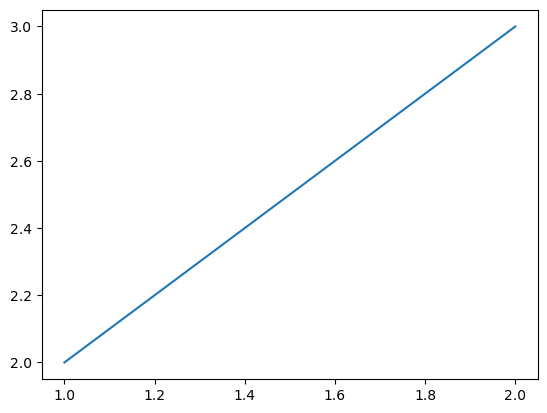

In [34]:
plt.plot([1, 2], [2, 3])

In [3]:
for i in range(1, 5):
    print(i)
    time.sleep(1)


1
2
3
4


In [3]:
K = 0.255
Eps = 1e-10
a2 = np.pi/2
a4 = np.pi
r = 0.01

#startPt = [-4.0854,   -2.1901,    0.8125,    1.1645,    1.9217,   -0.5392]
#startPt = [-15.707963267948973,   6.283185309257285,    -18.849555921660528,
#           -3.141592653589792,    -2.567258188334185e-14,   3.1415916495384404]
val = 0.1
#startPt = [3.141592653589786 + val, 2.0776989018145287e-09 + val, 6.283185307057817 + val,
#            3.1415926535897944 + val, 6.2831853071795605 + val, 3.1415916495384404 + val]
startPt = [np.pi - val, 0 + val, 0 + val,
           np.pi - val, 0 + val, np.pi - val]

In [3]:
def evt(val):
    def Evt(t, x):
        #return np.sin(x[0] - val)
        #return np.sin(x[0]/2) - val
        return x[0] - np.pi/4
    return Evt

evt.terminal = False
evt.direction = 0

def integration(Sys, StartPt, Tspan, Ttrans, Method, Event = {}, Kwargs = {'rtol': 1e-13, 'atol': 1e-13}):
    sol = solve_ivp(Sys, [0, Ttrans], StartPt, method=Method, **Kwargs)
    NewPt = sol.y[:, -1]
    sol = solve_ivp(Sys, [0, Tspan], NewPt, events=Event, method=Method, **Kwargs)
    return sol

In [4]:
#rhs = coupleBickSystem_RAW(K, Eps, a2, a4, r)
#rhs = coupleBickSystem_Simplifyed(K, Eps, a2, a4, r)
#rhs = coupleBickSystem_SympComb(K, Eps, a2, a4, r)
rhs = coupleBickSystem(K, Eps, a2, a4, r)

In [5]:
sol = integration(rhs, startPt, 100000, 10000, 'DOP853', evt(0.75))
sol.message

'The solver successfully reached the end of the integration interval.'

In [26]:
sol.y[:, -1].any() > 2*np.pi

False

3.141592653589452
3.4179814251283897e-13
3.5864190939087
1.073790533528972e-12


(15000.0, 20000.0)

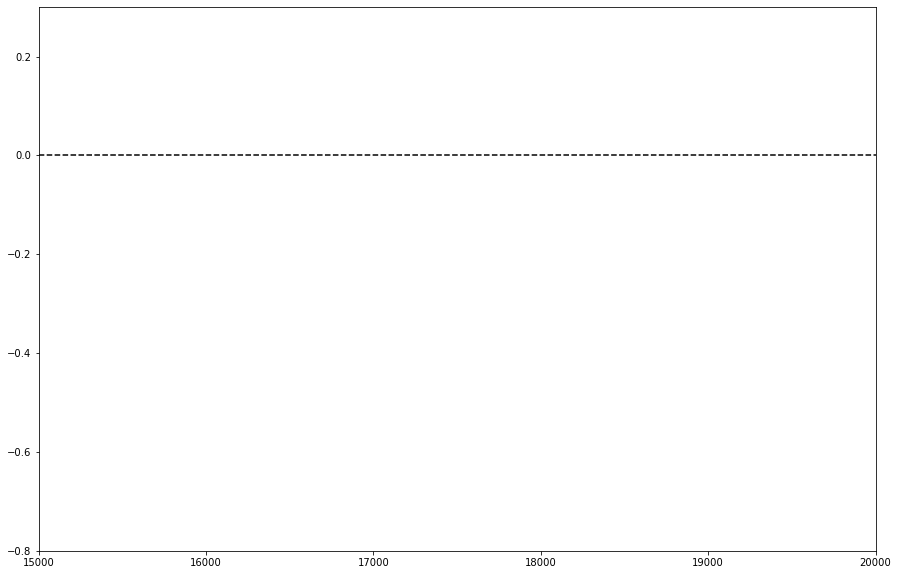

In [67]:
plt.figure(figsize=(15, 10))
k = 5
Max = max(sol.y[k])
Min = min(sol.y[k])

print(Max)
print(Min)
print(Max % 2*np.pi)
print(abs(Min) % 2*np.pi)

#plt.plot(sol.t, (1-np.cos(sol.y[k]))/2)
#plt.plot(sol.t, (sol.y[k] - np.pi/2) % (2*np.pi) - np.pi)
plt.plot(sol.t, np.sin(sol.y[k]/2) - 0.75)
plt.plot([0, 100000], [0, 0], 'k--')
#plt.plot(sol.t, np.cos(sol.y[k]))
#plt.plot(sol.t, sol.y[k])
#plt.plot([sol.t[0], sol.t[-1]], [Max, Max], 'k--')
#plt.plot([sol.t[0], sol.t[-1]], [Min, Min], 'k--')

#for i in range(10):
#    plt.plot([sol.t[0], sol.t[-1]], [i*np.pi, i*np.pi], 'k--')
#    plt.plot([sol.t[0], sol.t[-1]], [-i*np.pi, -i*np.pi], 'k--')

plt.xlim([15000, 20000])
#plt.ylim([0, 100])

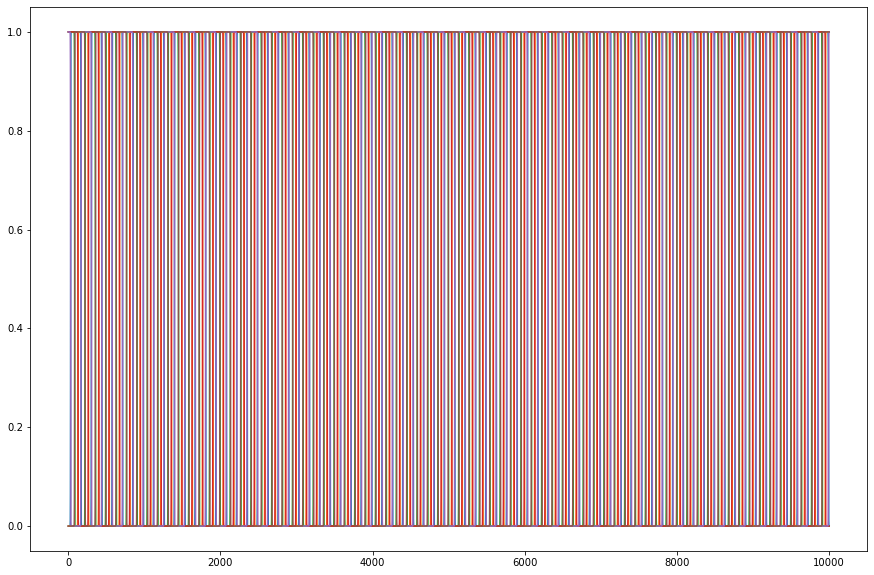

In [68]:
plt.figure(figsize=(15, 10))
plt.plot(sol.t, (1-np.cos(sol.y[0]))/2, label='$\psi_1$',)
plt.plot(sol.t, (1-np.cos(sol.y[1]))/2, label='$\psi_2$',)
plt.plot(sol.t, (1-np.cos(sol.y[2]))/2, label='$\psi_3$',)
plt.plot(sol.t, (1-np.cos(sol.y[3]))/2, label='$\phi_1$',)
plt.plot(sol.t, (1-np.cos(sol.y[4]))/2, label='$\phi_2$',)
plt.plot(sol.t, (1-np.cos(sol.y[5]))/2, label='$\phi_3$',)
#plt.plot([sol.t[0], sol.t[-1]], [0.999, 0.999], 'k--')
#plt.legend()
#plt.xlim([8000, 9000])
#plt.ylim([0.98, 1.01])

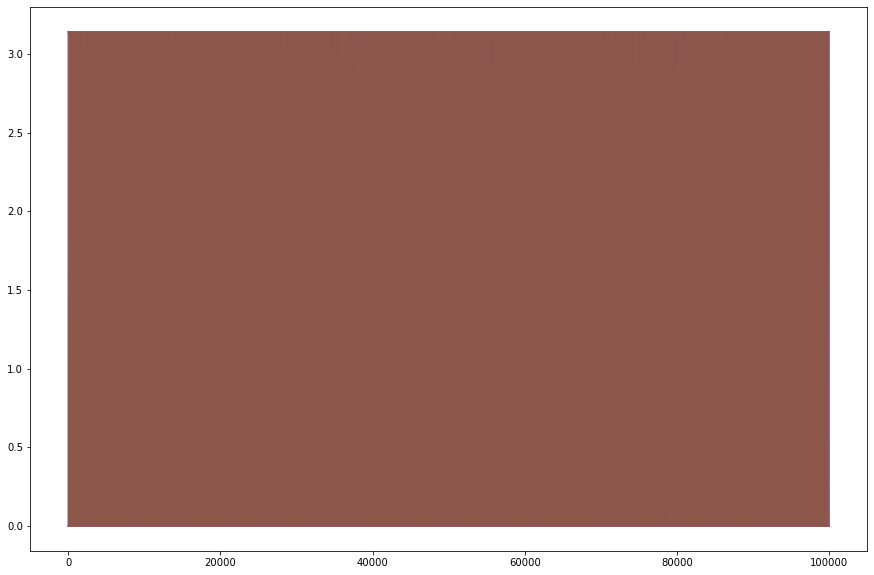

In [6]:
plt.figure(figsize=(15, 10))
#plt.plot(sol.t, sol.y, label='$\psi_1$',)
plt.plot(sol.t, sol.y[0], label='$\psi_1$',)
plt.plot(sol.t, sol.y[1], label='$\psi_2$',)
plt.plot(sol.t, sol.y[2], label='$\psi_3$',)
plt.plot(sol.t, sol.y[3], label='$\phi_1$',)
plt.plot(sol.t, sol.y[4], label='$\phi_2$',)
plt.plot(sol.t, sol.y[5], label='$\phi_3$',)
#plt.plot([sol.t[0], sol.t[-1]], [0.999, 0.999], 'k--')
#plt.legend()
#plt.xlim([90000, 100000])
#plt.ylim([0.98, 1.01])

In [93]:
sol = type('', (), {})()
sol.t = np.loadtxt("Sol_t")
y = np.loadtxt("Sol_u")
#sol.y = [list(y[:, 0]), list(y[:, 1]), list(y[:, 2]), list(y[:, 3]), list(y[:, 4]), list(y[:, 5])]
sol.y = [y[:, 0], y[:, 1], y[:, 2], y[:, 3], y[:, 4], y[:, 5]]

In [7]:
def plotProjections(sol, projFunc, outFilePath, plotKwargs):
    fig = plt.figure(figsize=(20, 30))
    gs = gridspec.GridSpec(nrows=5, ncols=3, wspace=0.25, hspace=0.25)

    Pairs = [[0, 1], [0, 2], [1, 2],
             [3, 4], [3, 5], [4, 5],
             [0, 3], [0, 4], [0, 5],
             [1, 3], [1, 4], [1, 5],
             [2, 3], [2, 4], [2, 5],]
    
    #Pairs = [0, 3], [0, 4], [0, 5]

    varNames = [r'\psi_1', r'\psi_2', r'\psi_3',
                r'\phi_1', r'\phi_2', r'\phi_3']

    Labels = [(projFunc.label(varNames[i]), projFunc.label(varNames[j])) for i, j in Pairs]

    k = 0
    for i in range(0, 5):
        for j in range(0, 3):
            if k < 16 :
                ax = fig.add_subplot(gs[i, j])
                ax.plot(projFunc(sol.y[Pairs[k][0]]), projFunc(sol.y[Pairs[k][1]]), **plotKwargs)
                plt.xlabel(Labels[k][0], fontsize=22)
                plt.ylabel(Labels[k][1],fontsize=22)
                ax.tick_params(which="major", width=1.0, labelsize=10)
                ax.tick_params(which="major", length=1.0, labelsize=10)
                k= k + 1

                

    # TIGHT LAYOUT!!!!!!!!!!!!
    plt.savefig(outFilePath, dpi=120, format='pdf', bbox_inches='tight')
    return None

In [8]:
def projHalfSin(X):
    #return np.sin(X/2)
    return X
projHalfSin.label= lambda varName: r'$\sin{{\frac{{{}}}{{2}}}}$'.format(varName)

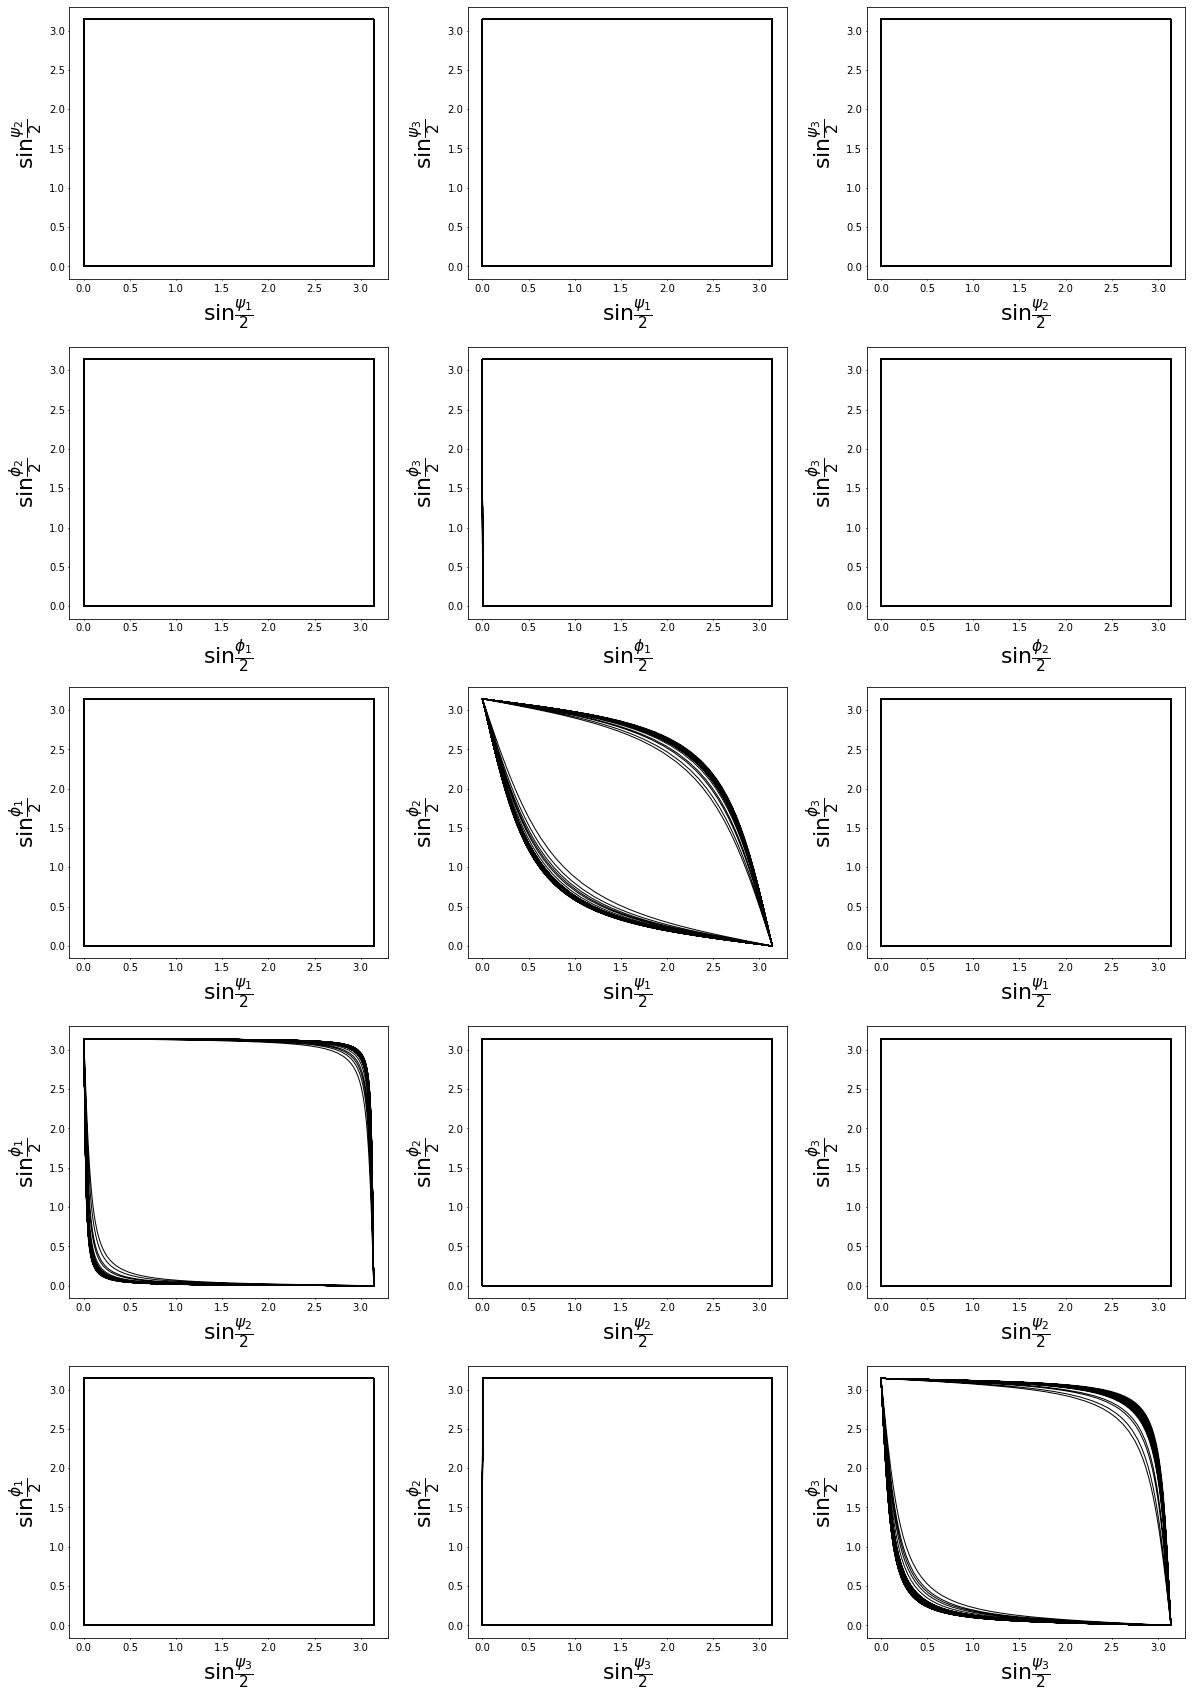

In [9]:
plotProjections(sol, projHalfSin, 'Projections_1e6.pdf', {'color': 'black', 'linewidth': 1})

# Диаграмма времени возвращения на секущую

In [13]:
Left = 1e-5
Right = 1e-3

intervals = 2
sub_intervals = 50

mesh = [0]*(intervals * sub_intervals)

k = 0
for i in range(0, intervals):
    sub_mesh = np.linspace(Left * (10**i), Left * (10**(i + 1)), sub_intervals+1)
    for j in range(0, sub_intervals):
        mesh[k] = sub_mesh[j]
        k = k + 1

In [45]:
#mesh = [1e-8, 2e-7, 1e-7, 0.5e-7, 1e-6, 1e-4, 1e-2]
i = 1
np.linspace(Left * (10**i), Left * (10**(i + 1)), sub_intervals+1)

array([1.00e-06, 1.18e-06, 1.36e-06, 1.54e-06, 1.72e-06, 1.90e-06,
       2.08e-06, 2.26e-06, 2.44e-06, 2.62e-06, 2.80e-06, 2.98e-06,
       3.16e-06, 3.34e-06, 3.52e-06, 3.70e-06, 3.88e-06, 4.06e-06,
       4.24e-06, 4.42e-06, 4.60e-06, 4.78e-06, 4.96e-06, 5.14e-06,
       5.32e-06, 5.50e-06, 5.68e-06, 5.86e-06, 6.04e-06, 6.22e-06,
       6.40e-06, 6.58e-06, 6.76e-06, 6.94e-06, 7.12e-06, 7.30e-06,
       7.48e-06, 7.66e-06, 7.84e-06, 8.02e-06, 8.20e-06, 8.38e-06,
       8.56e-06, 8.74e-06, 8.92e-06, 9.10e-06, 9.28e-06, 9.46e-06,
       9.64e-06, 9.82e-06, 1.00e-05])

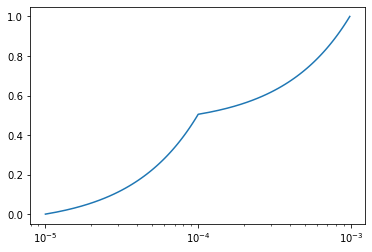

In [113]:
plt.plot(mesh, np.linspace(0,1,100))
plt.gca().set_xscale("log")

In [114]:
K = 0.4
Eps = 1e-10
a2 = np.pi/2
a4 = np.pi
r = 0.1
startPt = [3.141592653589786, 2.0776989018145287e-09, 6.283185307057817,
            3.1415926535897944, 6.2831853071795605, 3.1415916495384404]

transientT = 1000
attractorT = 10000

def evt(val):
    def Evt(t, x):
        return np.sin(x[0] - val)
    return Evt

timeDiffs = []
aVals = []
    
for i, Cur_Eps in enumerate(mesh):
    curSys = coupleBickSystem(K, Cur_Eps, a2, a4, r)
    
    sol = integration(curSys, startPt, attractorT, transientT, 'DOP853', evt(np.pi/2))
    
    # save information about attractor
    timeDiffs.append(sol.t_events[0][1 :] - sol.t_events[0][: -1])
    aVals.append(Cur_Eps)
    
    # adjust new point
    startPt = sol.y[:,-1]
    print(f"i = {i} a = {Cur_Eps} : new pt [{startPt[0]}, {startPt[1]}, {startPt[2]}]")

i = 0 a = 1e-05 : new pt [342.43359927346177, 339.7913828527359, 345.57520896926707]
i = 1 a = 1.18e-05 : new pt [691.150383789754, 688.0087911436075, 694.2808728153093]
i = 2 a = 1.3600000000000002e-05 : new pt [1043.0087609918123, 1039.8671823458476, 1046.150376312073]
i = 3 a = 1.54e-05 : new pt [1401.1502733485574, 1398.0087312227859, 1401.1560010652793]
i = 4 a = 1.72e-05 : new pt [1762.406343642877, 1759.2918995737257, 1762.4341813825909]
i = 5 a = 1.9e-05 : new pt [2126.85822647859, 2123.7166338867946, 2127.0801489198057]
i = 6 a = 2.0800000000000004e-05 : new pt [2494.4245669502957, 2491.2829856134176, 2497.5661942704564]
i = 7 a = 2.26e-05 : new pt [2865.1326716681, 2864.2072178293156, 2868.2741475017815]
i = 8 a = 2.4400000000000004e-05 : new pt [3242.1222046416474, 3238.9820276610594, 3242.1264922377136]
i = 9 a = 2.62e-05 : new pt [3619.1147369354394, 3615.9731443411365, 3622.2537365356443]
i = 10 a = 2.8000000000000003e-05 : new pt [3999.2474480198066, 3996.1058740615426, 

In [ ]:
newList = [list(row) for row in timeDiffs]

In [105]:
#np.savetxt("timeDiffs_1", newList, 'dtype=object')
#np.savetxt("aVals_1", aVals)
np.savetxt("timeDiffs_1", newList)

TypeError: Mismatch between array dtype ('object') and format specifier ('%.18e')

In [107]:
np.savetxt("123", [[1, 2], [1, 2]])

ValueError: operands could not be broadcast together with shapes (100,) (98,) 

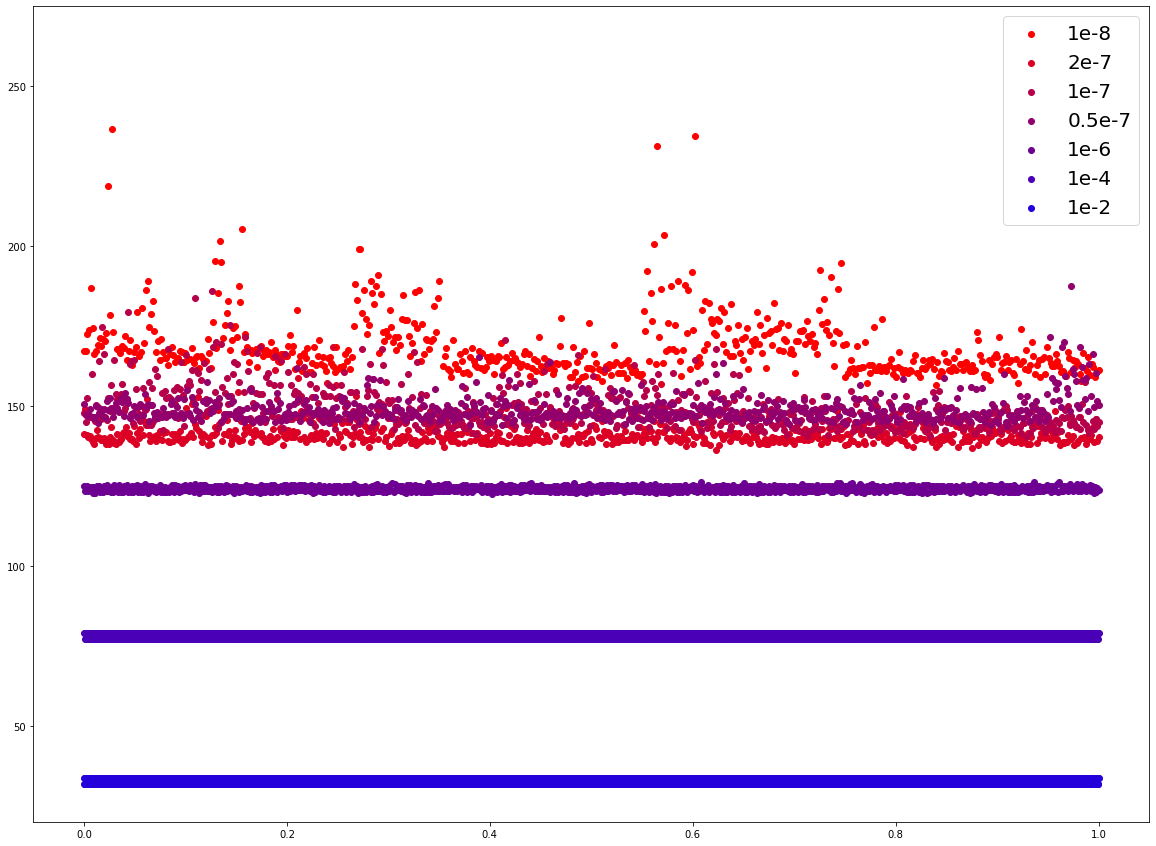

In [105]:
plt.figure(figsize=(20, 15))
for i in range(0, len(timeDiffs)):
    color = (1 - i/len(timeDiffs), 0, i/len(timeDiffs))
    plt.scatter(np.linspace(0, 1, len(timeDiffs[i])), timeDiffs[i], color = color)    
plt.ylim([20, 275])
plt.legend(['1e-8', '2e-7', '1e-7', '0.5e-7', '1e-6', '1e-4', '1e-2'])
plt.rc('legend',fontsize=40)

In [59]:
from numpy import array
f = open('./TimeDiffs_1e5____1e3.txt', 'r')
data = f.read()
f.close()
timeDiffs = eval(data)
aVals = np.linspace(0, 1, 100)

In [60]:
#aVals = [math.log(dat, 10) for dat in np.logspace(1e-5, 1e-3, 100)]; aVals

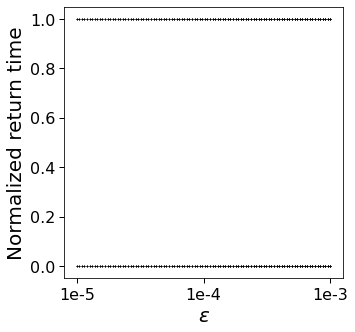

In [61]:
plt.figure(figsize=(5, 5))

for i in range(0, len(timeDiffs)):
    NormTimeDiff = (timeDiffs[i] - min(timeDiffs[i]))/(max(timeDiffs[i]) - min(timeDiffs[i]))
    #plt.scatter(np.linspace(aVals[i], aVals[i], len(NormTimeDiff)), NormTimeDiff, color = 'black', s = 0.01)
    #TimeDiff = timeDiffs[i]
    plt.scatter(np.linspace(aVals[i], aVals[i], len(NormTimeDiff)), NormTimeDiff, color = 'black', s = 0.01)
    
    
#plt.ylim([20, 275])
#plt.legend(['1e-8', '2e-7', '1e-7', '0.5e-7', '1e-6', '1e-4', '1e-2'])
plt.rc('legend',fontsize=40)
#plt.gca().set_xscale("log")
#plt.ylim([50, 105])
plt.xlabel('$\\varepsilon$',fontsize=20)
plt.ylabel('Normalized return time',fontsize=20)
plt.gca().tick_params(which="major", width=1.0, labelsize=16)
plt.gca().tick_params(which="major", length=5, labelsize=16)
plt.xticks([0, 0.5, 1], ['1e-5', '1e-4', '1e-3'])
plt.savefig('ReturnTime_1e5__1e3.pdf', dpi=120, format='pdf', bbox_inches='tight')

In [156]:
f = open('./TimeDiffs_1e5____1e3.txt', 'r')
data = f.read()
f.close()

In [157]:
from numpy import array

In [158]:
realData = eval(data)

In [159]:
timeDiffs = realData

In [16]:
from celluloid import Camera
from matplotlib import pyplot as plt

fig = plt.figure(figsize=(20, 5))
camera = Camera(fig)
for i in range(0, len(timeDiffs)):
    color = (1 - i/len(timeDiffs), 0, i/len(timeDiffs))
    scat = plt.scatter(np.linspace(0, 1, len(timeDiffs[i])), timeDiffs[i], color = color)
    plt.legend([f'Eps = {aVals[i]}'])
    camera.snap()
plt.ylim([20, 275])

animation = camera.animate()
animation.save('celluloid_minimal.gif', writer = 'imagemagick')

NameError: name 'timeDiffs' is not defined

<Figure size 1440x360 with 0 Axes>

In [107]:
t_diff = sol.t_events[0][1 :] - sol.t_events[0][: -1]
NormTimeDiff = (t_diff - min(t_diff))/(max(t_diff) - min(t_diff))

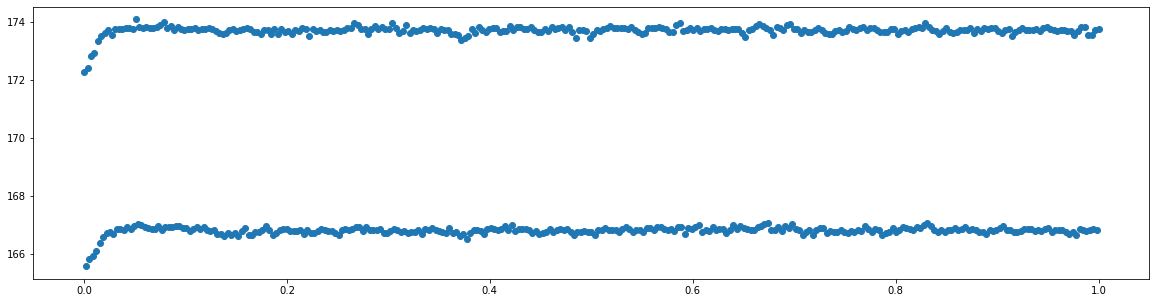

In [113]:
plt.figure(figsize=(20, 5))
plt.scatter(np.linspace(0, 1, len(t_diff)), t_diff)

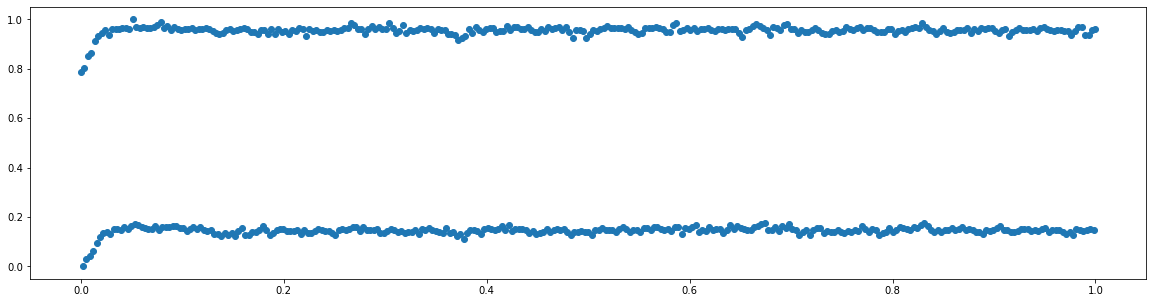

In [109]:
plt.figure(figsize=(20, 5))
plt.scatter(np.linspace(0, 1, len(NormTimeDiff)), NormTimeDiff)

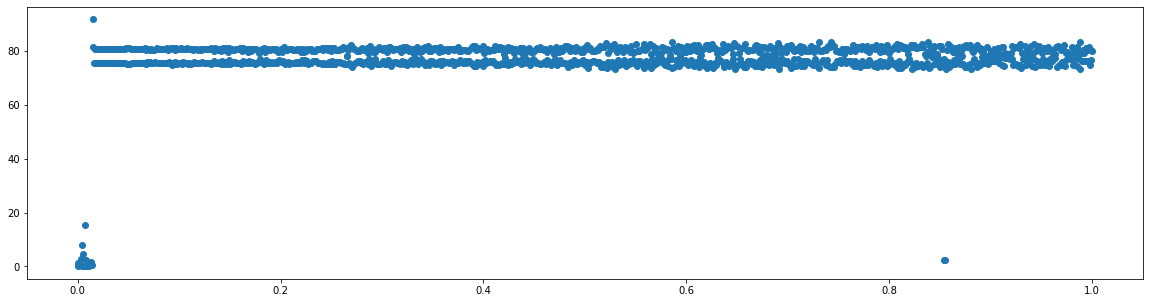

In [35]:
plt.figure(figsize=(20, 5))
plt.scatter(np.linspace(0, 1, len(t_diff)), t_diff)

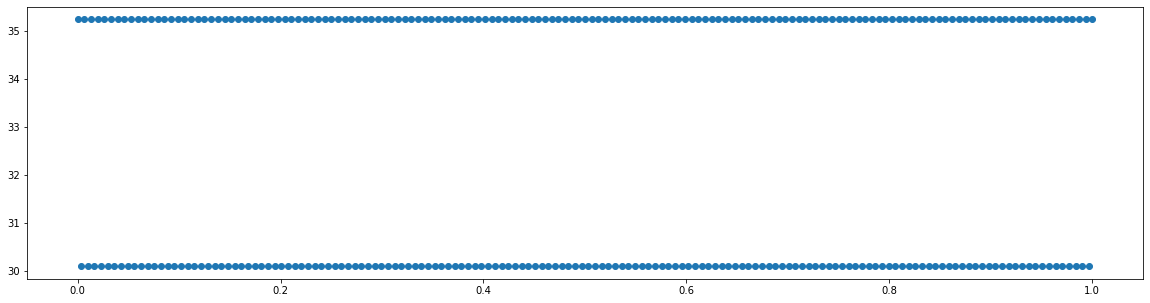

In [56]:
plt.figure(figsize=(20, 5))
plt.scatter(np.linspace(0, 1, len(t_diff)), t_diff)

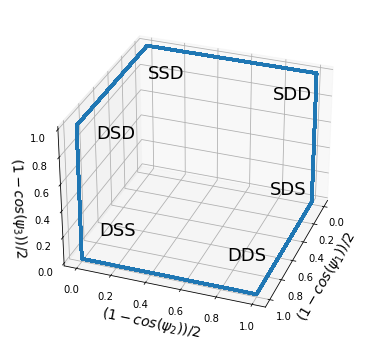

In [97]:
FS = 14

ax = plt.figure(figsize=(6, 6)).add_subplot(projection='3d')
#ax = plt.figure().add_subplot(projection='3d')

time = 10000

ax.plot((1-np.cos(sol.y[0][0:time]))/2, (1-np.cos(sol.y[2][0:time]))/2, (1-np.cos(sol.y[1][0:time]))/2, lw=3)
ax.set_xlabel("$(1 - cos(\psi_1))/2$", fontsize=FS)
ax.set_ylabel("$(1 - cos(\psi_2))/2$", fontsize=FS)
ax.set_zlabel("$(1 - cos(\psi_3))/2$", fontsize=FS)
ax.set_labelpad = 10
#ax.set_title("Lorenz Attractor")

#plt.rcParams['font.size'] = '16'


FS = 18

TextCoord = 0.75
#TextCoord = 0.75*np.pi
ax.text(TextCoord, 0, 0, s = "DSS", fontsize=FS)
ax.text(0, TextCoord, 0, s = "SDS", fontsize=FS)
ax.text(0, 0, TextCoord, s = "SSD", fontsize=FS)
ax.text(TextCoord, TextCoord, 0, s = "DDS", fontsize=FS)
ax.text(TextCoord, 0, TextCoord, s = "DSD", fontsize=FS)
ax.text(0, TextCoord, TextCoord, s = "SDD", fontsize=FS)

ax.tick_params(which="major", width=5.0, labelsize=10)
ax.tick_params(which="major", length=5.0, labelsize=10)

ax.view_init(30, 20)

plt.savefig('DDD_SSS.pdf', dpi=120, format='pdf', bbox_inches='tight')

plt.show()

# Mapping

In [219]:
sol.t_events[0].size

5461

In [7]:
def projFunc(x):
    return (x) % (2*np.pi)
projFunc.label = lambda varName: r'${}\;\, {{\rm mod}} \; 2\pi$'.format(varName)

def plotPoincare(sol, projFunc, outFilePath, plotKwargs):
    fig = plt.figure(figsize=(20, 30))
    gs = gridspec.GridSpec(nrows=5, ncols=3, wspace=0.25, hspace=0.25)

    Pairs = [[0, 1], [0, 2], [1, 2],
             [3, 4], [3, 5], [4, 5],
             [0, 3], [0, 4], [0, 5],
             [1, 3], [1, 4], [1, 5],
             [2, 3], [2, 4], [2, 5],]

    varNames = [r'\psi_1', r'\psi_2', r'\psi_3',
                r'\phi_1', r'\phi_2', r'\phi_3']

    Labels = [(projFunc.label(varNames[i]), projFunc.label(varNames[j])) for i, j in Pairs]

    k = 0
    for i in range(0, 5):
        for j in range(0, 3):
            if k < 16 :
                ax = fig.add_subplot(gs[i, j])
                ax.scatter(projFunc(sol.y_events[0][:, Pairs[k][0]]), projFunc(sol.y_events[0][:, Pairs[k][1]]), **plotKwargs)
                plt.xlabel(Labels[k][0], fontsize=20)
                plt.ylabel(Labels[k][1], fontsize=20)
                k= k + 1

    # TIGHT LAYOUT!!!!!!!!!!!!            
    fig.savefig(outFilePath)
    return None

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

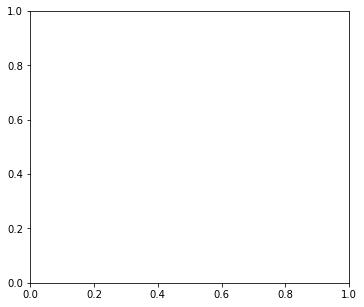

In [8]:
plotPoincare(sol, projFunc, 'Poincare.pdf', {'color': 'black', 'linewidth': 1})

# Orbit diagram

In [71]:
Left = 1e-14
Right = 1e-2

intervals = 12
sub_intervals = 50

mesh = [0]*(intervals * sub_intervals)

k = 0
for i in range(0, intervals):
    sub_mesh = np.linspace(Left * (10**i), Left * (10**(i + 1)), sub_intervals)
    for j in range(0, sub_intervals):
        mesh[k] = sub_mesh[j]
        k = k + 1


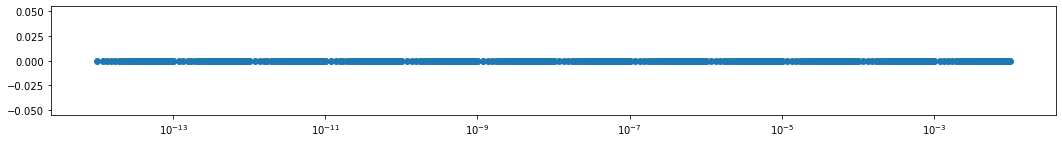

In [72]:
fig = plt.figure(figsize=(18, 2))
plt.scatter(mesh, [np.linspace(0,0,intervals * sub_intervals)])
plt.gca().set_xscale("log")

In [18]:
mesh

NameError: name 'mesh' is not defined

In [76]:
mesh = np.linspace(1e-8, 1e-5 + 1e-8, 101)

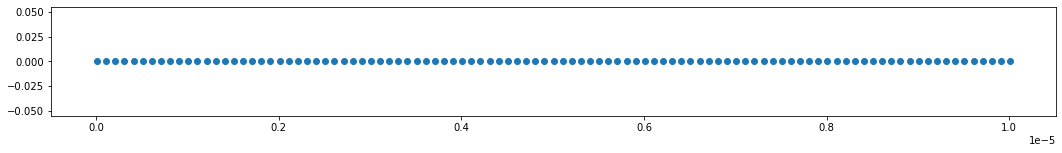

In [79]:
fig = plt.figure(figsize=(18, 2))
plt.scatter(mesh, [np.linspace(0,0,101)])
#plt.gca().set_xscale("log")

In [80]:
K = 0.4
Eps = 1e-10
a2 = np.pi/2
a4 = np.pi
r = 0.1
startPt = [3.141592653589786, 2.0776989018145287e-09, 6.283185307057817,
            3.1415926535897944, 6.2831853071795605, 3.1415916495384404]

transientT = 1000
attractorT = 10000

def evt(t, X):
    return (X[0] % (2*np.pi)) - np.pi
evt.terminal = False
evt.direction = 0

sectionCoordsPsi1 = []
sectionCoordsPsi2 = []
sectionCoordsPsi3 = []
sectionCoordsPhi1 = []
sectionCoordsPhi2 = []
sectionCoordsPhi3 = []
aVals = []
    
for i, Cur_Eps in enumerate(mesh):
    curSys = coupleBickSystem(K, Cur_Eps, a2, a4, r)
    
    # first compute transient 
    sol = solve_ivp(curSys, [0, transientT], startPt, method='DOP853', rtol=1e-13, atol=1e-13)
    newPt = sol.y[:, -1]
    
    # then compute attractor
    sol = solve_ivp(curSys, [0, attractorT], newPt, method='DOP853', rtol=1e-13, atol=1e-13, events=evt)
    
    # save information about attractor
    yEvts = sol.y_events
    sectionCoordsPsi1.append(yEvts[0][:, 0])
    sectionCoordsPsi2.append(yEvts[0][:, 1])
    sectionCoordsPsi3.append(yEvts[0][:, 2])
    sectionCoordsPhi1.append(yEvts[0][:, 3])
    sectionCoordsPhi2.append(yEvts[0][:, 4])
    sectionCoordsPhi3.append(yEvts[0][:, 5])
    aVals.append(Cur_Eps)
    
    # adjust new point
    startPt = sol.y[:,-1]
    print(f"i = {i} a = {Cur_Eps} : new pt [{startPt[0]}, {startPt[1]}, {startPt[2]}]")

i = 0 a = 1e-08 : new pt [201.0619298464135, 160.22122533307936, 138.23007675806917]
i = 1 a = 1.1e-07 : new pt [436.6813790323127, 395.8406743523137, 373.8495257808476]
i = 2 a = 2.1000000000000003e-07 : new pt [681.7256180751241, 644.0161838735057, 622.0353454448995]
i = 3 a = 3.1000000000000005e-07 : new pt [936.1946130849589, 897.1258249716346, 876.5043509030512]
i = 4 a = 4.1000000000000004e-07 : new pt [1196.946801709298, 1156.1060965217061, 1134.4641914571723]
i = 5 a = 5.100000000000001e-07 : new pt [1460.8405863723153, 1419.9998875723106, 1401.1500034831602]
i = 6 a = 6.100000000000001e-07 : new pt [1727.8759625337696, 1687.1718922094192, 1668.1857000732655]
i = 7 a = 7.100000000000001e-07 : new pt [1998.0750662905693, 1960.3538158399438, 1938.3626672657324]
i = 8 a = 8.100000000000001e-07 : new pt [2274.463953518074, 2233.6723767023427, 2211.681228127233]
i = 9 a = 9.100000000000001e-07 : new pt [2547.9575002648103, 2510.132530218245, 2488.1413816431764]
i = 10 a = 1.01e-06 :

Text(0, 0.5, '$\\phi_3$')

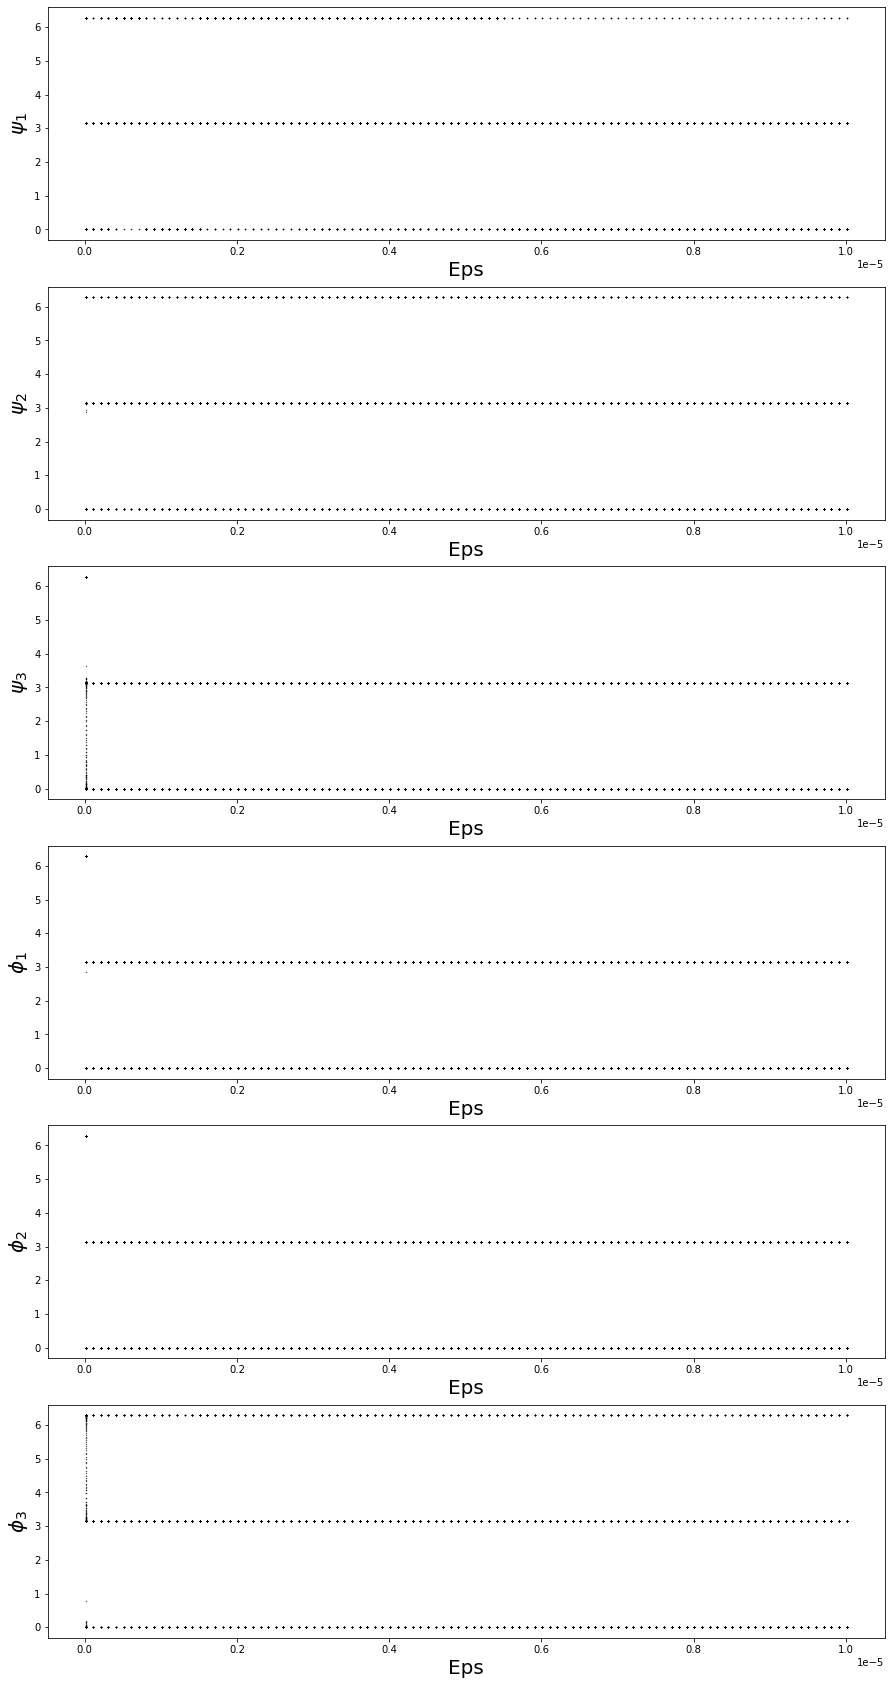

In [82]:
fig = plt.figure(figsize=(15, 30))
gs = gridspec.GridSpec(nrows=6, ncols=1)

ax = fig.add_subplot(gs[0, 0])
for aVal, ptSet in zip(aVals, sectionCoordsPsi1):
    plt.scatter([aVal]*len(ptSet), (ptSet - np.pi) % (2*np.pi), c='black', s = 0.1)
#plt.gca().set_xscale("log")
plt.xlabel('Eps', fontsize=20)
plt.ylabel('$\psi_1$',fontsize=20)

ax = fig.add_subplot(gs[1, 0])
for aVal, ptSet in zip(aVals, sectionCoordsPsi2):
    plt.scatter([aVal]*len(ptSet), (ptSet - np.pi) % (2*np.pi), c='black', s = 0.1)
#plt.gca().set_xscale("log")
plt.xlabel('Eps', fontsize=20)
plt.ylabel('$\psi_2$',fontsize=20)

ax = fig.add_subplot(gs[2, 0])
for aVal, ptSet in zip(aVals, sectionCoordsPsi3):
    plt.scatter([aVal]*len(ptSet), (ptSet - np.pi) % (2*np.pi), c='black', s = 0.1)
#plt.gca().set_xscale("log")
plt.xlabel('Eps', fontsize=20)
plt.ylabel('$\psi_3$',fontsize=20)

ax = fig.add_subplot(gs[3, 0])
for aVal, ptSet in zip(aVals, sectionCoordsPhi1):
    plt.scatter([aVal]*len(ptSet), (ptSet - np.pi) % (2*np.pi), c='black', s = 0.1)
#plt.gca().set_xscale("log")
plt.xlabel('Eps', fontsize=20)
plt.ylabel('$\phi_1$',fontsize=20)

ax = fig.add_subplot(gs[4, 0])
for aVal, ptSet in zip(aVals, sectionCoordsPhi2):
    plt.scatter([aVal]*len(ptSet), (ptSet - np.pi) % (2*np.pi), c='black', s = 0.1)
#plt.gca().set_xscale("log")
plt.xlabel('Eps', fontsize=20)
plt.ylabel('$\phi_2$',fontsize=20)

ax = fig.add_subplot(gs[5, 0])
for aVal, ptSet in zip(aVals, sectionCoordsPhi3):
    plt.scatter([aVal]*len(ptSet), (ptSet - np.pi) % (2*np.pi), c='black', s = 0.1)
#plt.gca().set_xscale("log")
plt.xlabel('Eps', fontsize=20)
plt.ylabel('$\phi_3$',fontsize=20)

# Activity map

In [40]:
def colorValue(x):
    color = (128, 128, 128) # red
    eps = 1e-3
    if abs(x) < eps:
        color = (255, 255, 255) # white
    elif abs(x-1) < eps:
        color = (0, 0, 0) # black
    
    return color

def normValue(x):
    eps = 1e-2
    label = 1.5
    if abs(abs(x) % (2 * np.pi)) < eps:
        label = 0.5 # white
    elif abs(abs(x) % (2 * np.pi) - np.pi) < eps:
        label = 2.5 # black
        
    return label

In [100]:
solMat = np.array(sol.y)

# width = 10
# height = 50
width = 1
height = 1

solThickMat = np.repeat(np.repeat(solMat, width, axis = 1), height, axis = 0)
# clrdPlt = [[colorValue(v) for v in row] for row in solThickMat]
# clrdPlt = [[normValue(v) for v in row] for row in solThickMat]

<ipython-input-101-f3afd75ae6be>:12: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(sol.t, range(7), clrdPlt, cmap=myCmap, norm=myNorm)


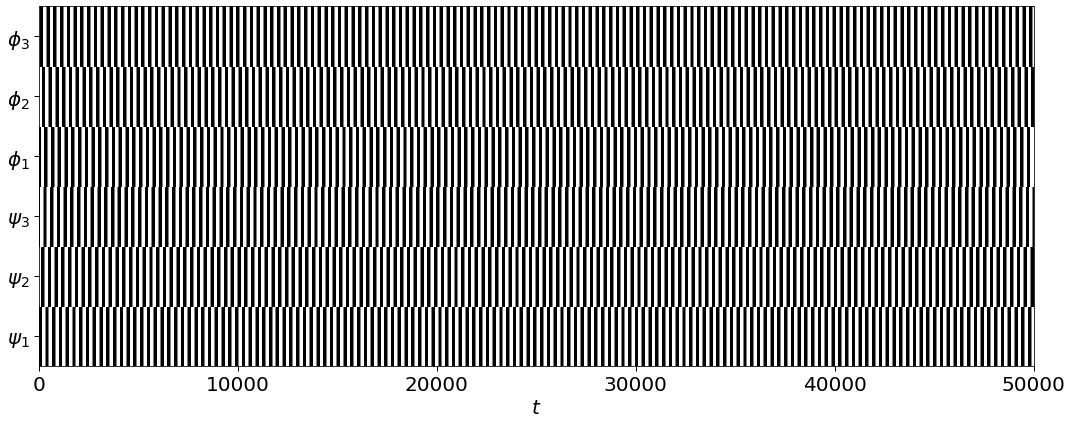

In [101]:
# plt.imshow(clrdPlt, aspect='auto', interpolation='none')
# # plt.tight_layout()

import matplotlib.colors as mpc

myCmap = mpc.ListedColormap(['white', 'gray', 'black'])
boundaries = [0, 1, 2, 3]
myNorm = mpc.BoundaryNorm(boundaries, myCmap.N, clip=True)
clrdPlt = [[normValue(v) for v in row] for row in solThickMat]

plt.figure(figsize=(15, 6))
plt.pcolormesh(sol.t, range(7), clrdPlt, cmap=myCmap, norm=myNorm)

plt.gca().set_yticks(0.5 + np.arange(6))
plt.gca().set_yticklabels([r'$\psi_1$',r'$\psi_2$',r'$\psi_3$',r'$\phi_1$',r'$\phi_2$',r'$\phi_3$',], fontsize=20)
#plt.xlim([98000, 100000])

plt.gca().tick_params(which="major", width=1.0, labelsize=20)
plt.gca().tick_params(which="major", length=5, labelsize=20)


plt.xlabel(r'$t$',fontsize=20)
plt.tight_layout()
# plt.savefig('activation-plot-short.png', facecolor='white')
#plt.savefig('ActivityDiagram_1e3_2.pdf', dpi=60, format='pdf', bbox_inches='tight')
plt.savefig('ActivityDiagram_1e3_2.png', dpi=120, format='png', bbox_inches='tight')

# Subspace classification

In [84]:
import subsp_classify as scl

In [85]:
x1, x2, x3, y1, y2, y3 = sol.y
pts = list(zip(x1, x2, x3, y1, y2, y3))

<ipython-input-86-7d4869a3a079>:11: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(sol.t, np.arange(len(descrList)), mat, cmap='binary')


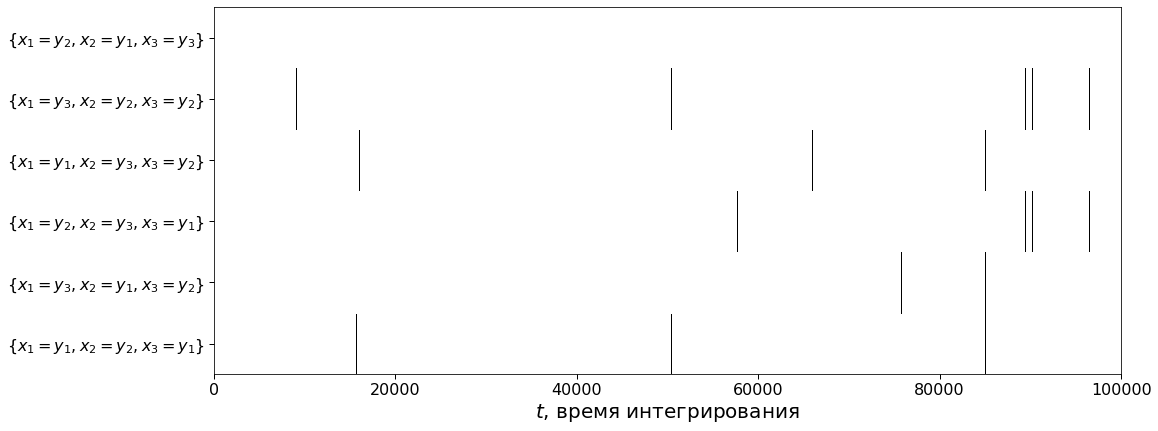

In [86]:
mat = np.array( [scl.IPS_clastSync3(pt, 1e-2) for pt in pts]).T

descrList = [r'$\{x_1 = y_1, x_2 = y_2, x_3 = y_1\}$',
             r'$\{x_1 = y_3, x_2 = y_1, x_3 = y_2\}$',
             r'$\{x_1 = y_2, x_2 = y_3, x_3 = y_1\}$',
             r'$\{x_1 = y_1, x_2 = y_3, x_3 = y_2\}$',
             r'$\{x_1 = y_3, x_2 = y_2, x_3 = y_2\}$',
             r'$\{x_1 = y_2, x_2 = y_1, x_3 = y_3\}$'
                 ]
plt.figure(figsize=(15, 6))
plt.pcolormesh(sol.t, np.arange(len(descrList)), mat, cmap='binary')



plt.gca().set_yticks(0.5 + np.arange(len(descrList)))
plt.gca().set_yticklabels((descrList))
plt.ylim([0, len(descrList)])
# plt.xlim([0, 12000])
plt.xlabel(r'$t$, время интегрирования',fontsize=20)
plt.tight_layout()
#plt.savefig('subspace-patterns.png')
plt.gca().tick_params(which="major", width=1.0, labelsize=16)
plt.gca().tick_params(which="major", length=5, labelsize=16)

<ipython-input-87-81ef1831f892>:14: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(sol.t, np.arange(len(descrList)), mat, cmap='binary')


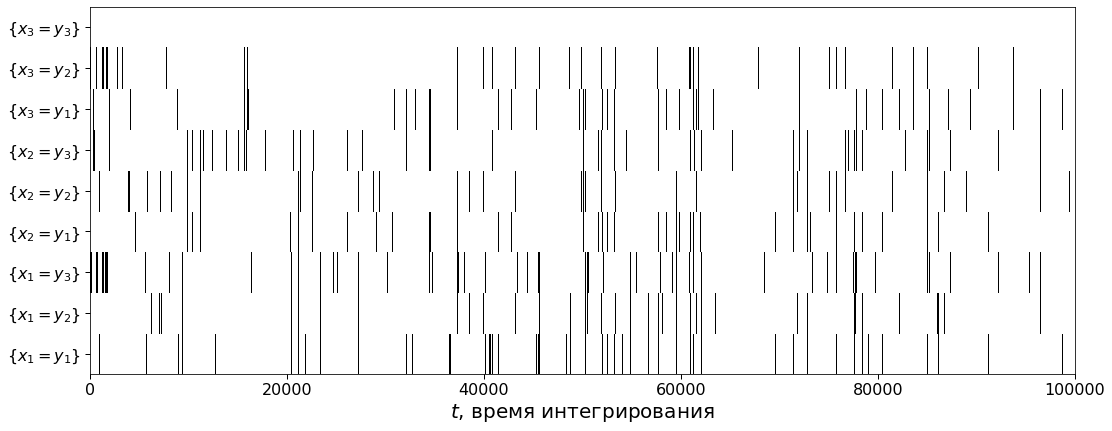

In [87]:
mat = np.array( [scl.IPS_clastSync2(pt, 1e-2) for pt in pts]).T

descrList = [r'$\{x_1 = y_1\}$',
             r'$\{x_1 = y_2\}$',
             r'$\{x_1 = y_3\}$',
             r'$\{x_2 = y_1\}$',
             r'$\{x_2 = y_2\}$',
             r'$\{x_2 = y_3\}$',
             r'$\{x_3 = y_1\}$',
             r'$\{x_3 = y_2\}$',
             r'$\{x_3 = y_3\}$'
                 ]
plt.figure(figsize=(15, 6))
plt.pcolormesh(sol.t, np.arange(len(descrList)), mat, cmap='binary')



plt.gca().set_yticks(0.5 + np.arange(len(descrList)))
plt.gca().set_yticklabels((descrList))
plt.ylim([0, len(descrList)])
# plt.xlim([0, 12000])
plt.xlabel(r'$t$, время интегрирования',fontsize=20)
plt.tight_layout()
#plt.savefig('subspace-patterns.png')
plt.gca().tick_params(which="major", width=1.0, labelsize=16)
plt.gca().tick_params(which="major", length=5, labelsize=16)

TypeError: Dimensions of C (0, 12109) are incompatible with X (12109) and/or Y (8); see help(pcolormesh)

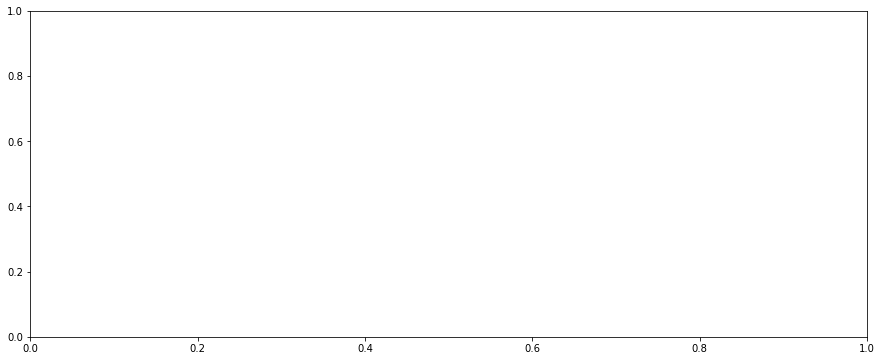

In [88]:
# plt.imshow(mat, aspect='auto', cmap='binary', interpolation='none')

# descrList = [r'$\{x_2 = 0\}$',
#                  r'$\{x_3 = 0\}$',
#                  r'$\{y_1 = 0\}$',
#                  r'$\{y_2 = 0\}$',
#                  r'$\{y_3 = 0\}$',
#                  r'$\{x_1 = y_1, x_2 = y_3, x_3 = y_2\}$',
#                  r'$\{x_1 = y_1 = 0\}$',
#                  r'$\{x_1 = x_2 = x_3 = y_1 = y_2 = y_3\}$']

descrList = [r'$\{x_1 = 0, x_2 = 0, x3 = 0\}$',
             r'$\{x_1 = 0, x_2 = 0, x3 = pi\}$',
             r'$\{x_1 = 0, x_2 = pi, x3 = 0\}$',
             r'$\{x_1 = pi, x_2 = 0, x3 = 0\}$',
             r'$\{x_1 = 0, x_2 = pi, x3 = pi\}$',
             r'$\{x_1 = pi, x_2 = 0, x3 = pi\}$',
             r'$\{x_1 = pi, x_2 = pi, x3 = 0\}$',
             r'$\{x_1 = pi, x_2 = pi, x3 = pi\}$'
                 ]
plt.figure(figsize=(15, 6))
plt.pcolormesh(sol.t, np.arange(len(descrList)), mat[12:19], cmap='binary')



plt.gca().set_yticks(0.5 + np.arange(len(descrList)))
plt.gca().set_yticklabels((descrList))
plt.ylim([0, len(descrList)])
# plt.xlim([0, 12000])
plt.xlabel(r'$t$, время интегрирования',fontsize=20)
plt.tight_layout()
#plt.savefig('subspace-patterns.png')
plt.gca().tick_params(which="major", width=1.0, labelsize=16)
plt.gca().tick_params(which="major", length=5, labelsize=16)

In [ ]:
# plt.imshow(mat, aspect='auto', cmap='binary', interpolation='none')

# descrList = [r'$\{x_2 = 0\}$',
#                  r'$\{x_3 = 0\}$',
#                  r'$\{y_1 = 0\}$',
#                  r'$\{y_2 = 0\}$',
#                  r'$\{y_3 = 0\}$',
#                  r'$\{x_1 = y_1, x_2 = y_3, x_3 = y_2\}$',
#                  r'$\{x_1 = y_1 = 0\}$',
#                  r'$\{x_1 = x_2 = x_3 = y_1 = y_2 = y_3\}$']

descrList = [r'$\{y_1 = 0, y_2 = 0, y3 = 0\}$',
             r'$\{y_1 = 0, y_2 = 0, y3 = pi\}$',
             r'$\{y_1 = 0, y_2 = pi, y3 = 0\}$',
             r'$\{y_1 = pi, y_2 = 0, y3 = 0\}$',
             r'$\{y_1 = 0, y_2 = pi, y3 = pi\}$',
             r'$\{y_1 = pi, y_2 = 0, y3 = pi\}$',
             r'$\{y_1 = pi, y_2 = pi, y3 = 0\}$',
             r'$\{y_1 = pi, y_2 = pi, y3 = pi\}$'
                 ]
plt.figure(figsize=(15, 6))
plt.pcolormesh(sol.t, np.arange(len(descrList)), mat[20:27], cmap='binary')



plt.gca().set_yticks(0.5 + np.arange(len(descrList)))
plt.gca().set_yticklabels((descrList))
plt.ylim([0, len(descrList)])
# plt.xlim([0, 12000])
plt.xlabel(r'$t$, время интегрирования',fontsize=20)
plt.tight_layout()
#plt.savefig('subspace-patterns.png')
plt.gca().tick_params(which="major", width=1.0, labelsize=16)
plt.gca().tick_params(which="major", length=5, labelsize=16)

In [7]:
import array

In [9]:
arr = [[0]*5]*5

In [12]:
arr[1][1] = 1

In [13]:
arr

[[0, 1, 0, 0, 0],
 [0, 1, 0, 0, 0],
 [0, 1, 0, 0, 0],
 [0, 1, 0, 0, 0],
 [0, 1, 0, 0, 0]]

TypeError: unsupported operand type(s) for %: 'list' and 'float'